# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

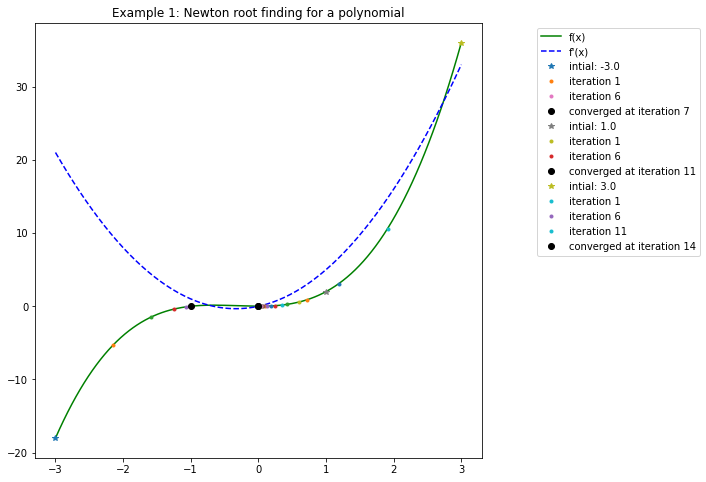

In [2]:
# Example 1: Root finding for cubic polynomial 

n = 200

x = np.linspace(-3, 3, n)  

def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

# Create the polynomial f(x) = x^3 + x^2 

p = np.poly1d([1, 1, 0, 0])

# Derivative of a polynomial
# This is a convenient method to obtain p_d = np.poly1d([3, 2, 0])

p_d = np.polyder(p)

# Get values for f(x) and f'(x) for graphing purposes

y = fx(x, p)
y_d = fx(x,p_d)

# Try three possible guesses for x0

x0_arr = [-3.0, 1.0, 3.0]
max_iter = 30
threshold = 0.001
roots = []

fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f\'(x)")

for x0 in x0_arr:
    # Plot initial data point
    plt.plot(x0, fx(x0,p), '*', label='intial: ' + str(x0))    
    i = 0
    while i < max_iter:
        # x1 = x0 - f(x0)/f'(x0)
        x1 = x0 - fx(x0, p) / fx(x0, p_d)
        # Check for delta (x) less than threshold
        if np.abs(x0 - x1) <= threshold:
            roots.append(round(x1,4))
            break;
        # Plot current root after every 5 iterations
        if i % 5 == 0:
            plt.plot(x1, fx(x1, p), '.', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1, p), '.')        
        x0 = x1
        i = i + 1
    plt.plot(x1, fx(x1, p), 'ko', label='converged at iteration '+ str(i+1))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 1: Newton root finding for a polynomial')

plt.show()



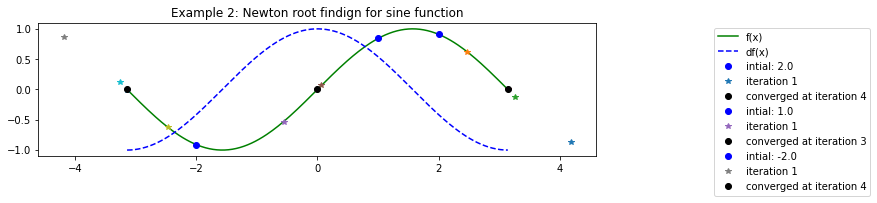

Roots: 3.141593, 0.000000, -3.141593


In [3]:
# Example 2: Root finding for sine function

n = 200

x = np.linspace(-np.pi, np.pi, n)

def fx(x):
    f_x = np.sin(x)
    return f_x

def fx_d(x):
    return np.cos(x)

# Get f(x) and f'(x) for plotting

y = fx(x)
y_d = fx_d(x)

# Consider three possible starting points

x0_arr = [2.0, 1.0, -2.0]
max_iter = 30
i = 0
threshold = 0.01
roots = []

fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

for x0 in x0_arr:
    plt.plot(x0, fx(x0), 'bo', label='intial: ' + str(x0))
    i = 0;
    while i < max_iter:
        x1 = x0 - fx(x0) / fx_d(x0)
        if np.abs(x0 - x1) <= threshold:
            roots.append(x1)
            plt.plot(x1,fx(x1),'ko',label='converged at iteration '+ str(i))
            break;
        if i % 5 == 0:
            plt.plot(x1, fx(x1), '*', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1), '*')        
        x0 = x1
        i = i + 1

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 2: Newton root findign for sine function')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))


## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}_f(\mathbf{x}_i) \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}_J(\theta^{(i)}) \nabla_J(\theta^{(i)}).$$


## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

Generate 100 samples for each of the classes.

In [4]:

# Generate data for class 1

mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100
cov_mat = np.matrix([[sigma_1,0],[0,sigma_1]])
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)

# Generate data for class 2

angle = np.random.uniform(0, 2*np.pi, num_sample)
d =  np.random.normal(np.square(3*sigma_1),np.square(.5*sigma_1),num_sample)
X2 = np.array([X1[:,0] + d*np.cos(angle), X1[:,1] + d*np.sin(angle)]).T

# Combine X1 and X2 into single dataset

X = np.concatenate([X1, X2],axis = 0)
y = np.append(np.zeros(num_sample),np.ones(num_sample))


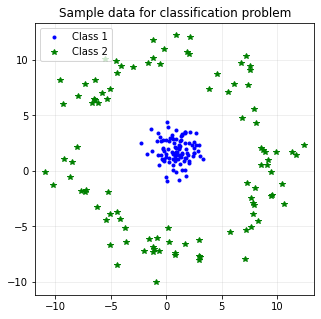

In [5]:
# Plot the data
fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
plt.legend(loc=2)
plt.axis('equal')
plt.show()

In [6]:
# Split data into training and test datasets

idx = np.arange(0,len(X),1)
np.random.shuffle(idx)
idx_train = idx[0:int(.8*len(X))]
idx_test = idx[len(idx_train):len(idx)]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

In [7]:
# Normalization of data
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    return X_norm

mean = np.mean(X,axis=0)
std = np.std(X,axis=0)

XX = (X-mean)/std
X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

X_design_train = np.insert(X_train_norm,0,1,axis=1)
X_design_test = np.insert(X_test_norm,0,1,axis=1)

m,n = X_design_train.shape

print(X_train_norm.shape)
print(X_design_train.shape)
print(X_test_norm.shape)
print(X_design_test.shape)

(160, 2)
(160, 3)
(40, 2)
(40, 3)


In [8]:
# define class for logistic regression: batch gradient descent
class Logistic_BGD:
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):   
        return 1 / (1 + np.exp(-z))

    def softmax(self, z):
        z -= np.max(z)
        return np.exp(z) / np.sum(np.exp(z))
    
    def h(self,X, theta):
        return self.sigmoid(X @ theta)
    
    def h2(self, X, theta):
        return self.softmax(np.dot(X,theta))
    
    def gradient(self, X, y, y_pred):
        m = len(y)
        grad = - X.T @ (y - y_pred) / m
        return grad
        
    def costFunc(self, theta, X, y):    
        m = len(y)
        y_pred = self.h(X,theta)
        error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
        cost = 1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            cost, grad = self.costFunc(theta,X,y)
            theta = theta - alpha * grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        for i in range(0,X.shape[0]):
            y1=self.h(X[i].reshape(1,-1),theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        y_pred=self.predict(X,theta)
        correct=np.sum(y_pred == y)
        total = y.size
        return (float(correct)/float(total))*100

In [9]:
initial_theta = np.zeros(n)

print(initial_theta)

[0. 0. 0.]


In [10]:
alpha = 0.001
iterations = 50000

BGD_model = Logistic_BGD()

bgd_theta, bgd_cost =  BGD_model.gradientAscent(X_design_train,y_train,initial_theta,alpha,iterations)
print(bgd_theta)

Minimum at iteration: 49999
[-0.12803295 -0.0970039  -0.15980734]


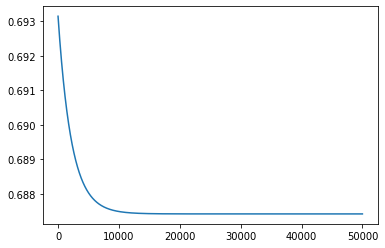

In [11]:
iter_series = np.linspace(1,iterations,iterations)
plt.plot(iter_series,bgd_cost)

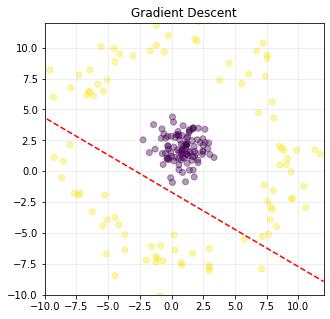

In [12]:
boundary_x = (np.linspace(-12,12,100)-mean[0])/std[0]
#print(boundary_x)
#print(X_train_norm[:,0])
boundary_y = (-bgd_theta[1]*boundary_x - bgd_theta[0])/bgd_theta[2]

boundary_x = boundary_x*std[0]+mean[0]
boundary_y = boundary_y*std[1]+mean[1]

fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title('Gradient Descent')
plt.grid(axis='both', alpha=.25)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.4)
plt.plot(boundary_x,boundary_y,'r--')
plt.xlim([-10,12])
plt.ylim([-10,12])
plt.show()

In [13]:
print("Accuracy =",BGD_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 60.0


In [14]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):   
        return 1 / (1 + np.exp(-z))

    def h(self,X, theta):
        return self.sigmoid(X @ theta)

    def gradient(self, X, y, y_pred):
        m = len(y)
        grad = - X.T @ (y - y_pred) / m
        return grad
        
    def hessian(self, X, y, theta):
        m = len(y)
        y_pred = self.h(X,theta).reshape(-1,1)
        hess_mat = X.T@X*(y_pred.T@(1-y_pred))/m
        return hess_mat
        
    def costFunc(self, theta, X, y):    
        m = len(y)
        y_pred = self.h(X,theta)
        error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
        cost = 1/m * sum(error)    
        grad = self.gradient(X, y, y_pred)
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            cost, grad = self.costFunc(theta,X,y)
            theta = theta - np.linalg.inv(self.hessian(X,y,theta))@grad
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        for i in range(0,X.shape[0]):
            y1=self.h(X[i].reshape(1,-1),theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        y_pred=self.predict(X,theta)
        correct=np.sum(y_pred == y)
        total = y.size
        return (float(correct)/float(total))*100

In [15]:
NM_model = Logistic_NM()

iterations = 1000

nm_theta, nm_cost = NM_model.newtonsMethod(X_design_train, y_train, initial_theta, iterations)
print("theta:",nm_theta)

Minimum at iteration: 999
theta: [-0.12777187 -0.0967997  -0.15946685]


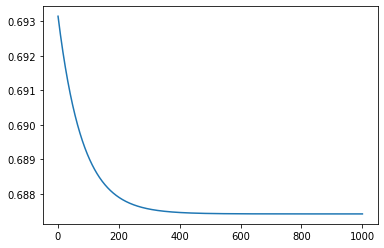

In [16]:
iter_series = np.linspace(1,iterations,iterations)
plt.plot(iter_series,nm_cost)

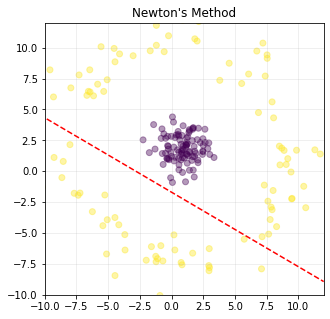

In [17]:
boundary_x = (np.linspace(-12,12,100)-mean[0])/std[0]
#print(boundary_x)
#print(X_train_norm[:,0])
boundary_y = (-nm_theta[1]*boundary_x - nm_theta[0])/nm_theta[2]

boundary_x = boundary_x*std[0]+mean[0]
boundary_y = boundary_y*std[1]+mean[1]

fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title("Newton's Method")
plt.grid(axis='both', alpha=.25)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.4)
plt.plot(boundary_x,boundary_y,'r--')
plt.xlim([-10,12])
plt.ylim([-10,12])
plt.show()

In [18]:
print("Accuracy =",NM_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 60.0


In [19]:
Xr_train = np.sqrt(np.sum(X_train**2,axis=1))
Xr_test = np.sqrt(np.sum(X_test**2,axis=1))

Xtheta_train = np.arctan2(X_train[:,1],X_train[:,0])
Xtheta_test = np.arctan2(X_test[:,1],X_test[:,0])

X_polar_train = np.concatenate((np.ones((Xr_train.size,1)),Xtheta_train.reshape(-1,1),Xr_train.reshape(-1,1)),axis=1)
X_polar_test = np.concatenate((np.ones((Xr_test.size,1)),Xtheta_test.reshape(-1,1),Xr_test.reshape(-1,1)),axis=1)
X_polar = np.concatenate((X_polar_train,X_polar_test),axis=0)


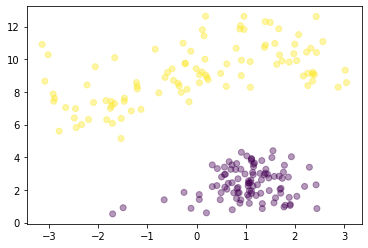

In [20]:
plt.scatter(X_polar[:,1],X_polar[:,2],c=np.concatenate((y_train,y_test),axis=0),alpha=0.4)

In [25]:
iterations = 5000

polar_theta, polar_cost = NM_model.newtonsMethod(X_polar_train, y_train, initial_theta, iterations)
print("theta:",polar_theta)

Minimum at iteration: 4999
theta: [-21.48917827  -3.02239951   4.32901366]


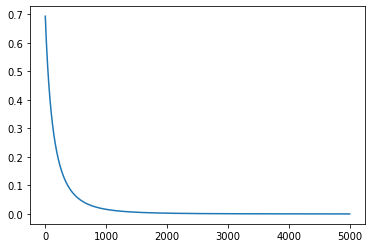

In [26]:
iter_series = np.linspace(1,iterations,iterations)
plt.plot(iter_series,polar_cost)

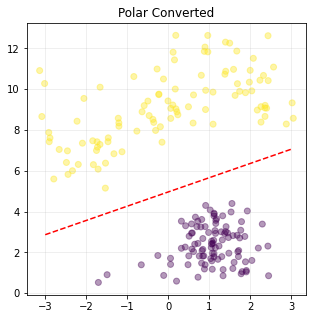

In [27]:
boundary_x = np.linspace(-3,3,100)
boundary_y = (-polar_theta[1]*boundary_x - polar_theta[0])/polar_theta[2]

fig1 = plt.figure(figsize=(5,5))
ax = plt.axes() 
plt.title("Polar Converted")
plt.grid(axis='both', alpha=.25)
plt.scatter(X_polar[:,1],X_polar[:,2],c=np.concatenate((y_train,y_test),axis=0),alpha=0.4)
plt.plot(boundary_x,boundary_y,'r--')
# plt.xlim([-10,12])
# plt.ylim([-10,12])
plt.show()

In [28]:
print("Accuracy =",NM_model.getAccuracy(X_polar_test,y_test,polar_theta))

Accuracy = 100.0
